In [1]:
from helpers import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import transforms

In [2]:
data_dir = "../precip_data"
data_dir = '/Volumes/My Passport for Mac/cnn/data_update/with_precip/precip_data'
season = 'JAS'

In [3]:
# binary: accum = False, accumulated precipitation: accum = True
accum = True
df_list, color_list, ranking_list, mean_list, names_ix = cpa_seasons(data_dir, accum = accum)

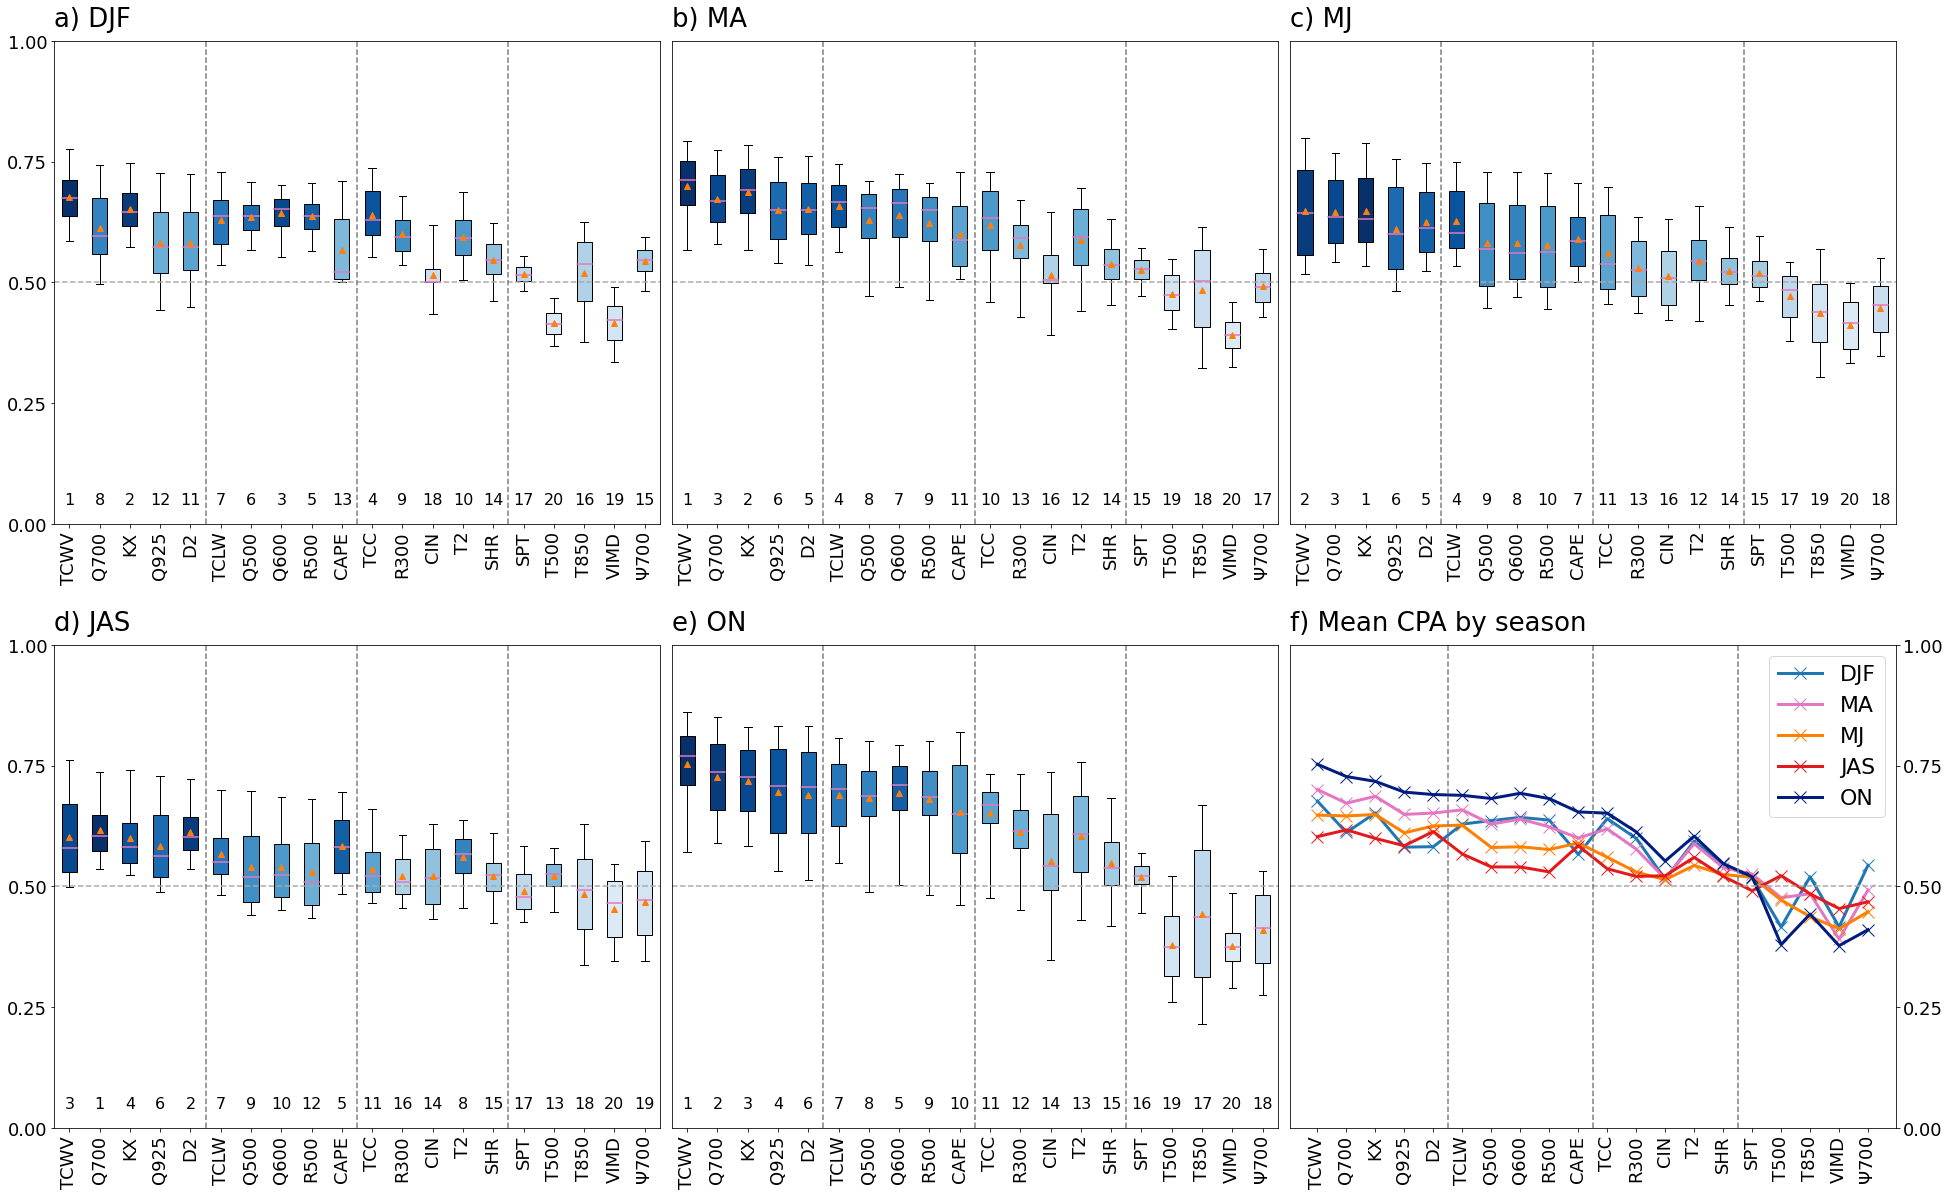

In [4]:
fig, ax = plt.subplots(2, 3,figsize=(33,20),  sharex=False, sharey=False)

ax = ax.ravel()
angle = 90
i = 0

pal = sns.color_palette("Paired")
pal2 = sns.color_palette("tab10")
pal3 = sns.color_palette("dark")
color_plot = [pal.as_hex()[1], pal2.as_hex()[6], pal.as_hex()[7], pal.as_hex()[5], pal.as_hex()[9]]
color_plot[4] = pal3.as_hex()[0]

for season in ['DJF', 'MA', 'MJ', 'JAS', 'ON']:
    df = df_list[i]
    color_list_season = color_list[i]
    cpa_mean = mean_list[i]
    ranking_ordered = ranking_list[i]

    h = ax[i].boxplot(
        df, vert=True, labels = df.columns, whis = [5, 95], 
        sym = '', showmeans = True,  
        medianprops={"linewidth": 1.5, 'color': '#e377c2'}, ##"color": '#9467bd'
        meanprops = {"markerfacecolor": '#ff7f0e', "markeredgecolor": '#ff7f0e'},#{"markerfacecolor": '#e377c2', "markeredgecolor": '#e377c2'},
        patch_artist=True,
    )
    
    for patch, color in zip(h['boxes'], color_list_season):
        patch.set_facecolor(color)
   
    ax[i].axhline(y=0.5, color='darkgrey', linestyle='--')
    ax[i].set_ylim(0, 1)
    ax[i].set_yticks([0, 0.25, 0.5,0.75 ,1])
    ax[i].tick_params(axis='y', which='major', labelsize=14)
    ax[i].tick_params(axis='x', which='major', labelsize=12)
    
    [ax[i].axvline(x,color = 'grey', linestyle='--') for x in [5.5, 10.5, 15.5]]
    
    
    pos = np.arange(len(df.columns)) + 1
    upper_labels = [str(s) for s in ranking_ordered+1]
    for tick in (range(len(df.columns))):
        k = tick % 2
        ax[i].text(pos[tick], .04, upper_labels[tick],
             transform=ax[i].get_xaxis_transform(),
             horizontalalignment='center', fontsize=16)
        
    #if i < 10:
    for label in ax[i].get_xticklabels():
        label.set_rotation(angle)
        label.set_size(18)
        label.rotation_mode='anchor'
    
    if i > 0:
        ax[i].set_yticks([])
    if i == 0 or i == 3:
        ax[i].set_yticks([0, 0.25, 0.5,0.75 ,1])
        ax[i].tick_params(axis='y', labelsize=18)

    
    ax[5].plot(cpa_mean ,'-x', label = season, color = color_plot[i], linewidth=3, markersize=12)      
    i = i+1

names = names_ix[0]
ix = names_ix[1]
name_order = np.asarray(names)[ix]
x  = plt.xticks(np.arange(len(ix)), name_order, fontsize=18)
ax[5].yaxis.set_label_position("right")
ax[5].yaxis.tick_right()
ax[5].tick_params(axis='y', labelsize=18)

ax[5].legend( fontsize="22")
#ax[i].set_ylim(0.28, 0.85)
ax[5].set_ylim(0, 1)
ax[5].set_yticks([0, 0.25, 0.5,0.75 ,1])
ax[5].axhline(y=0.5, color='darkgrey', linestyle='--')  

plt.subplots_adjust(wspace=0.02, hspace=0.25)
x = plt.xticks(rotation=angle, fontsize  = 18)#,ha = 'right',  rotation_mode='anchor')
[ax[5].axvline(x,color = 'grey', linestyle='--') for x in [4.5, 9.5, 14.5]]
        
if accum:
    score = 'CPA'
else:
    score = 'AUC'

label_panel(ax[0],'a) DJF',  postfix='')
label_panel(ax[1],'b) MA',  postfix='')
label_panel(ax[2],'c) MJ',  postfix='')
label_panel(ax[3],'d) JAS',  postfix='')
label_panel(ax[4],'e) ON',  postfix='')
label_panel(ax[5],'f) Mean '+ score + ' by season', postfix = '')